# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [115]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Data Cleaning

In [116]:
# set your column as the dataframe index
df = pd.read_csv('training_data.csv', index_col = 0)



In [117]:
df = df.drop('ID', axis = 0)


In [118]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [119]:
df.Y.value_counts()

0    17471
1     5028
Name: Y, dtype: int64

In [120]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'
# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [121]:
# X1 and 12 

In [122]:
cols = ['X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [123]:
cols = ['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [124]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [125]:
df['Y'] = df['Y'].apply(pd.to_numeric, errors='coerce')

In [126]:
#make more readable
df.columns = ['credit', 'gender', 'education', 'marital_status', 'age', 'sept_status', 'aug_status', 'jul_status', 'jun_status', 'may_status', 'apr_status', 
              'sept_bill', 'aug_bill', 'jul_bill', 'jun_bill', 'may_bill', 'apr_bill',
              'sept_pay', 'aug_pay', 'jul_pay', 'jun_pay', 'may_pay', 'apr_pay', 'default_or_not']

In [127]:
df.head()

,credit,gender,education,marital_status,age,sept_status,aug_status,jul_status,jun_status,may_status,...,jun_bill,may_bill,apr_bill,sept_pay,aug_pay,jul_pay,jun_pay,may_pay,apr_pay,default_or_not
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [128]:
# Unbalanced data 
df.default_or_not.value_counts()

0    17471
1     5028
Name: default_or_not, dtype: int64

## 2. EDA

In [193]:
df.gender.unique()

array([2, 1])

In [194]:
# Use bill amount vs credit, how much of their credit are they using? First and last.
df['credit_used_sept'] = df['sept_bill']/df['credit']
df['credit_used_aug'] = df['aug_bill']/df['credit']

In [195]:
df['credit_used_aug'].value_counts()

0.000000    1849
0.007800      24
0.013000      23
0.019500      22
0.004875      21
            ... 
0.238260       1
0.229722       1
0.032867       1
1.057129       1
0.002138       1
Name: credit_used_aug, Length: 19146, dtype: int64

In [196]:
# amount paid / bill amout to know if they pay full amount or extra? First and last.
#df['pay_vs_bill_sept'] = df['sept_pay']/df['aug_bill']
#df['pay_vs_bill_apr'] = df['may_pay']/df['apr_bill']

In [197]:
#Never defaulted make column with 1 or 0 


df['default_3']= df['sept_status']+df['aug_status']+df['jul_status']

 


In [189]:
df['education']=np.where(df['education'] == 5, 4, df['education'])
df['education']=np.where(df['education'] == 6, 4, df['education'])
df['education']=np.where(df['education'] == 0, 4, df['education'])

In [192]:
df['marital_status']=np.where(df['marital_status'] == 0, 3, df['marital_status'])


In [136]:
# Average paid vs amount over all months


In [137]:
# Average bill vs credit over all months 


In [138]:
# alpha .03

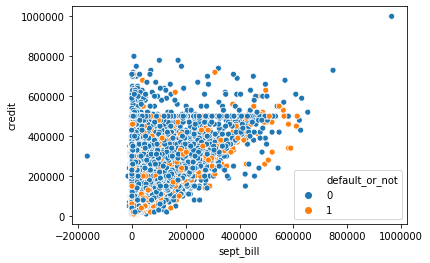

In [55]:
sns.scatterplot(x='sept_bill', y='credit', data=df, hue='default_or_not') 
alpha=0.3

In [56]:
# bill statement how much you spent in Sept
# payment what you paid for the month before off set of 1 likely 

## 3. Feature Engineering

In [57]:
# Use bill amount vs credit, how much of their credit are they using?

In [58]:
# amount paid / bill amout to know if they pay full amount or extra?

In [59]:
# increasing debt, if debt % gets bigger you can see they are using credit more 

In [60]:
# moving averages: take april may june #, may june july #, july aug sept #, sept oct nov #, etc how percent changes over time

In [61]:
#plt.figure(figsize = (10,7))
#sns.boxplot(x = 'Education', y = 'default_or_not', data = df, palette= 'GnBu_d').set_title('Default By Education')
#plt.show()

## 4. Feature Selection

In [139]:
# Dummy Regressor 

In [198]:
# define targets and features
y = df['default_or_not']
X = df.drop(columns = 'default_or_not', axis = 1)

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [199]:
# Logistic Regression

In [200]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.ensemble import VotingClassifier

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
LogReg = LogisticRegression(solver='liblinear',class_weight = 'balanced', max_iter = 200)


In [202]:
scale = StandardScaler()
transformed = scale.fit_transform(X_train)
X_train = pd.DataFrame(transformed, columns = X_train.columns)

In [203]:
transformed = scale.transform(X_test)
X_test = pd.DataFrame(transformed, columns = X_train.columns)

In [204]:
# Logistic Regression

In [205]:
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [206]:
print('F1: ', f1_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

F1:  0.5050809183289423
Accuracy:  0.7077777777777777


In [207]:
LogRegLasso = LogisticRegression(penalty = 'l1', tol = 0.0001, C = 1, solver='liblinear', class_weight = 'balanced', max_iter = 300)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
LogRegLasso.fit(X_train, y_train)
y_pred_lasso = LogRegLasso.predict(X_test)

In [208]:
print('F1: ', f1_score(y_test, y_pred_lasso))
print('Accuracy: ', accuracy_score(y_test, y_pred_lasso))

F1:  0.5048982667671439
Accuracy:  0.708


In [151]:
from imblearn.over_sampling import SMOTE

In [152]:
sm = SMOTE(sampling_strategy = 'minority', n_jobs = -1, random_state = 42)

In [153]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knnModel = KNeighborsClassifier(n_neighbors = 3, p = 2, n_jobs = -1)

In [156]:
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [157]:
y_pred_knn = knnModel.predict(X_test)

In [158]:
print('F1: ', f1_score(y_test, y_pred_knn))
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

F1:  0.3613045071454746
Accuracy:  0.6126666666666667


In [167]:
knnModel2 = KNeighborsClassifier(n_neighbors = 20, algorithm = 'ball_tree', p = 2, n_jobs = -1)

In [168]:
knnModel2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=20)

In [169]:
y_pred_knn2 = knnModel2.predict(X_test)

In [170]:
print('F1: ', f1_score(y_test, y_pred_knn2))
print('Accuracy: ', accuracy_score(y_test, y_pred_knn2))

F1:  0.3992015968063873
Accuracy:  0.5986666666666667


In [171]:
rfc = RandomForestClassifier(random_state = 1, n_estimators = 300, max_depth = 5, max_features = 4, class_weight = 'balanced', criterion = 'gini')

In [172]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=4,
                       n_estimators=300, random_state=1)

In [173]:
y_pred_rfc = rfc.predict(X_test)

In [174]:
print('F1: ', f1_score(y_test, y_pred_rfc))
print('Accuracy: ', accuracy_score(y_test, y_pred_rfc))

F1:  0.5364238410596027
Accuracy:  0.7822222222222223


In [175]:
rfc2 = RandomForestClassifier(random_state = 1, class_weight = 'balanced')

In [176]:
param_grid = {'max_depth': list(range(1,10)), 
              'n_estimators': [100, 200, 300, 500, 700, 1000], 
              'max_features': [.2, .4, .5, .75],
              'criterion': ['gini', 'entropy']}

In [177]:
rfc_grid = GridSearchCV(rfc2, param_grid = param_grid, cv=5, scoring='f1', verbose = 1, n_jobs = -1)

In [201]:
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 108.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 179.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 259.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 360.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.2, 0.4, 0.5, 0.75],
                         'n_estimators': [100, 200, 300, 500, 700, 1000]},
             scoring='f1', verbose=1)

In [204]:
print('F1: ', f1_score(y_test, y_pred_rfc))
print('Accuracy: ', accuracy_score(y_test, y_pred_rfc))

F1:  0.532639545884579
Accuracy:  0.7804444444444445


In [178]:
param_grid = {'max_depth': list(range(1,10)), 
              'n_estimators': [100, 200, 300, 500, 700, 1000], 
              'max_features': [.2, .4, .5, .75],
              'criterion': ['gini', 'entropy']}

In [179]:
def objective(trial): 
    rfc_max_depth = trial.suggest_int('max_depth', 1,10)
    rfc_n_estimators = trial.suggest_int('n_estimators', 100, 1000) 
    rfc_max_features = trial.suggest_loguniform('max_features', .2, .75)
    rfc_criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
    rfc = RandomForestClassifier(random_state = 1, max_depth = rfc_max_depth, n_estimators = rfc_n_estimators,
                                 max_features = rfc_max_features, criterion = rfc_criterion, class_weight = 'balanced')
    rfc.fit(X_train, y_train)
    y_pred_optuna = rfc.predict(X_test)
    return (1 - f1_score(y_test, y_pred_optuna))
    

In [180]:
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

KeyboardInterrupt: 

In [181]:
# Trials of Importance 

rfc_trial3 = RandomForestClassifier(random_state = 1, max_depth = 2 , n_estimators = 224,
                                 max_features = .31556256, criterion = 'gini', class_weight = 'balanced')

rfc_trial6 = RandomForestClassifier(random_state = 1, max_depth = 2 , n_estimators = 594,
                                 max_features = .38831983448141755, criterion = 'entropy', class_weight = 'balanced')

rfc_trial7 = RandomForestClassifier(random_state = 1, max_depth = 1 , n_estimators = 259,
                                 max_features = .48588000087486216, criterion = 'entropy', class_weight = 'balanced')

rfc_trial27 = RandomForestClassifier(random_state = 1, max_depth = 1 , n_estimators = 518,
                                 max_features = .43927864018334645, criterion = 'entropy', class_weight = 'balanced')


rfc_trial35 = RandomForestClassifier(random_state = 1, max_depth = 1 , n_estimators = 718,
                                 max_features = .33194911328577587, criterion = 'entropy', class_weight = 'balanced')

rfc_trial61 = RandomForestClassifier(random_state = 1, max_depth = 1 , n_estimators = 702,
                                 max_features = .3052949970843152, criterion = 'entropy', class_weight = 'balanced')

In [182]:
rfc_trial6.fit(X_train, y_train)
y_pred_trial6 = rfc_trial6.predict(X_test)

In [183]:
f1_score(y_test, y_pred_trial6)

0.5350383631713556

In [184]:
rfc_trial61.fit(X_train, y_train)
y_pred_trial61 = rfc_trial61.predict(X_test)

In [185]:
f1_score(y_test, y_pred_trial61)

0.5334013258541561

In [146]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

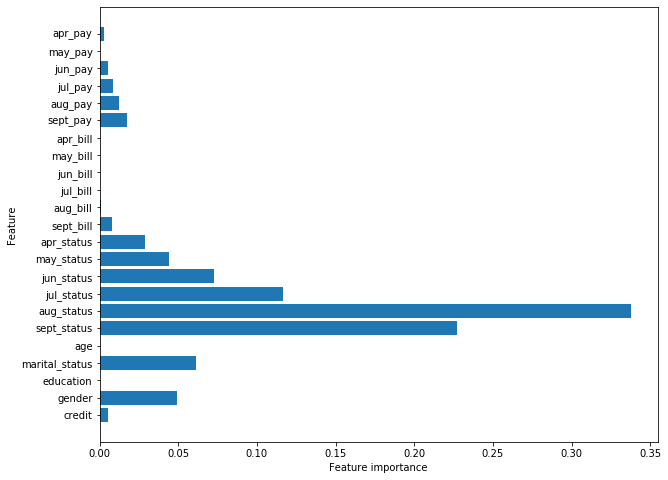

In [147]:
plot_feature_importances(rfc_trial6)

In [158]:
rfc_trial6.feature_importances_


array([5.42224410e-03, 4.91162998e-02, 0.00000000e+00, 6.11711857e-02,
       0.00000000e+00, 2.27226524e-01, 3.37792906e-01, 1.16494963e-01,
       7.28425253e-02, 4.39594853e-02, 2.87695558e-02, 8.18487815e-03,
       1.16228195e-03, 1.74341737e-04, 1.50463100e-04, 2.12289113e-04,
       0.00000000e+00, 1.75992357e-02, 1.23338950e-02, 8.31280395e-03,
       5.54280202e-03, 4.23307109e-04, 3.10801387e-03])

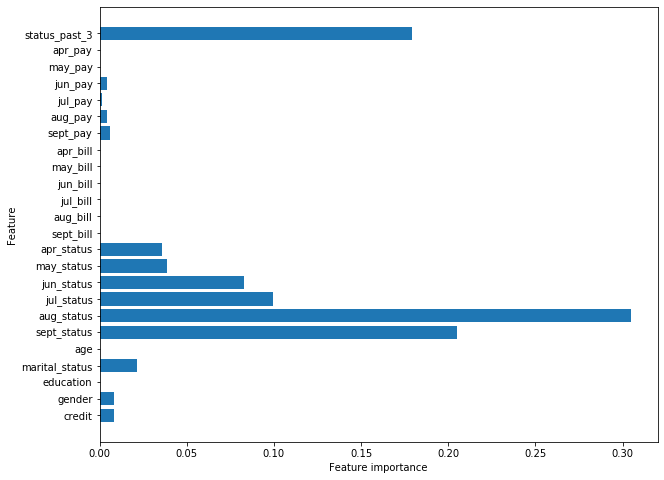

In [215]:
plot_feature_importances(rfc_trial61)

In [ ]:
# Voting Classifier 

In [186]:
voteBlue = VotingClassifier( estimators=[('logreg', LogReg), ('decisiontree6', rfc_trial6), ('decisiontree3', rfc_trial3), ('decisiontree0', rfc), 
                                         ('decisiontree7', rfc_trial7), ('decisiontree27', rfc_trial35), ('decisiontree35', rfc_trial35), ('decisiontree61', rfc_trial61)], voting='hard')

In [187]:
voteBlue.fit(X_train, y_train)
y_pred_voteBlue = voteBlue.predict(X_test)

In [188]:
f1_score(y_test, y_pred_voteBlue)

0.5327868852459016

## 6. Model Evaluation

## 7. Final Model

In [ ]:
# This will be ranked using the F1 score


In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(grid_tree.best_estimator_) 
  
# Load the pickled model 
# knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
# knn_from_pickle.predict(X_test) 